In [23]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Define constants
IMG_SIZE = 128
NUM_CLASSES = 5

# Define class mapping
class_map = {
    'line': 0,
    'dot_line': 1,
    'hbar_categorical': 2,
    'vbar_categorical': 3,
    'pie': 4
}

# Load data
data_dir = '/content/drive/My Drive/Colab Notebooks/Sem 2/Machine Learning/Assignment 2/Problem 3/charts/'
labels = pd.read_csv(os.path.join(data_dir, 'train_val.csv'))
labels['type'] = labels['type'].map(class_map)
X = []
y = []
for i, row in labels.iterrows():
    img = cv2.imread(os.path.join(data_dir, 'train_val', str(row['image_index'] )+".png"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    X.append(img)
    y.append(row['type'])
X = np.array(X)
y = to_categorical(y, NUM_CLASSES)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

class ChartClassifier:
    def __init__(self, img_size=128, num_classes=5):
        self.img_size = img_size
        self.num_classes = num_classes
        self.model = None
        self.history = None
        
    def build_model(self):
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(self.img_size, self.img_size, 3)))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.num_classes, activation='softmax'))
        
    def compile_model(self):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      
        
    def train(self, X_train, y_train, X_val, y_val, batch_size, num_epochs):
        self.history = self.model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val))
        
        
    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def get_history(self):
        return self.history


# Create an instance of the ChartClassifier class and build the model
model = ChartClassifier()
model.build_model()
model.compile_model()

# Train the model
model.train(X_train, y_train, X_val, y_val, batch_size=32, num_epochs=30)


Epoch 1/30
25/25 [==============================] - 26s 1s/step - loss: 214.2666 - accuracy: 0.3900 - val_loss: 1.1927 - val_accuracy: 0.6750
Epoch 2/30
25/25 [==============================] - 26s 1s/step - loss: 0.8563 - accuracy: 0.7025 - val_loss: 0.4430 - val_accuracy: 0.9150
Epoch 3/30
25/25 [==============================] - 23s 921ms/step - loss: 0.4341 - accuracy: 0.8587 - val_loss: 0.1440 - val_accuracy: 0.9600
Epoch 4/30
25/25 [==============================] - 26s 1s/step - loss: 0.2744 - accuracy: 0.8925 - val_loss: 0.1548 - val_accuracy: 0.9700
Epoch 5/30
25/25 [==============================] - 24s 977ms/step - loss: 0.2108 - accuracy: 0.9200 - val_loss: 0.1048 - val_accuracy: 0.9700
Epoch 6/30
25/25 [==============================] - 26s 1s/step - loss: 0.1325 - accuracy: 0.9538 - val_loss: 0.0698 - val_accuracy: 0.9750
Epoch 7/30
25/25 [==============================] - 26s 1s/step - loss: 0.1028 - accuracy: 0.9575 - val_loss: 0.1009 - val_accuracy: 0.9650
Epoch 8/30
2

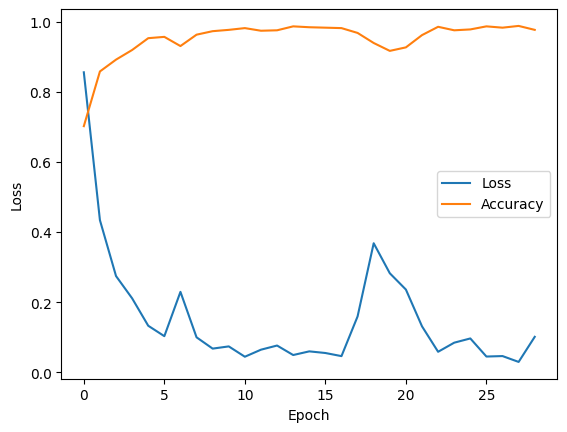

In [25]:
# Plot the loss
plt.plot(model.get_history().history['loss'][1:], label='Loss')
plt.plot(model.get_history().history['accuracy'][1:], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

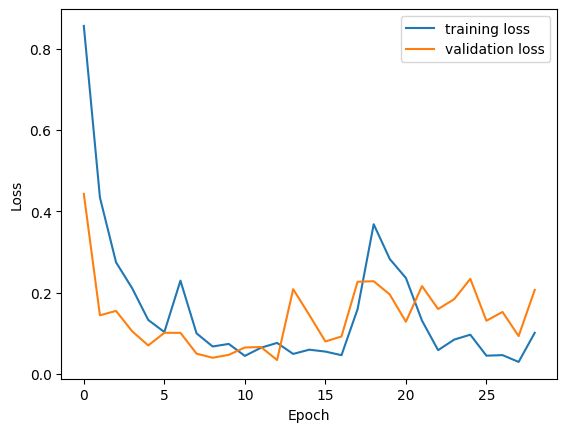

In [26]:
# Plot the loss
plt.plot(model.get_history().history['loss'][1:], label='training loss')
plt.plot(model.get_history().history['val_loss'][1:], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Evaluate model on test data
test_labels = pd.read_csv(os.path.join(data_dir, 'test.csv'))
test_labels['type'] = test_labels['type'].map(class_map)
X_test = []
y_test = []
for i, row in test_labels.iterrows():
    img = cv2.imread(os.path.join(data_dir, 'test', str(row['image_index'] )+".png"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    X_test.append(img)
    y_test.append(row['type'])
X_test = np.array(X_test)
y_test = to_categorical(y_test, NUM_CLASSES)

loss, acc = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {acc:.4f}')

2/2 [==============================] - 0s 98ms/step - loss: 0.1540 - accuracy: 0.9565
Test loss: 0.1540
Test accuracy: 0.9565


In [28]:
X_pred = model.predict(X_test)
print('Actual value: ', np.argmax(y_test[0]))
print('Predicted Value: ', np.argmax(X_pred[0]))

2/2 [==============================] - 0s 95ms/step
Actual value:  3
Predicted Value:  3
